# Gaussian Curvature: Theory and Computation

## Introduction

Gaussian curvature is one of the most fundamental concepts in differential geometry, named after Carl Friedrich Gauss who proved his remarkable *Theorema Egregium* ("Remarkable Theorem") in 1827. This intrinsic measure of curvature has profound implications in mathematics, physics, and computer graphics.

## Mathematical Theory

### Definition

For a smooth surface $S$ embedded in $\mathbb{R}^3$, the **Gaussian curvature** $K$ at a point $p$ is defined as the product of the principal curvatures:

$$K = \kappa_1 \cdot \kappa_2$$

where $\kappa_1$ and $\kappa_2$ are the maximum and minimum normal curvatures at point $p$.

### Parametric Representation

For a parametric surface $\mathbf{r}(u,v) = (x(u,v), y(u,v), z(u,v))$, we define:

**First Fundamental Form Coefficients:**
$$E = \mathbf{r}_u \cdot \mathbf{r}_u, \quad F = \mathbf{r}_u \cdot \mathbf{r}_v, \quad G = \mathbf{r}_v \cdot \mathbf{r}_v$$

**Second Fundamental Form Coefficients:**
$$L = \mathbf{r}_{uu} \cdot \mathbf{n}, \quad M = \mathbf{r}_{uv} \cdot \mathbf{n}, \quad N = \mathbf{r}_{vv} \cdot \mathbf{n}$$

where the unit normal vector is:
$$\mathbf{n} = \frac{\mathbf{r}_u \times \mathbf{r}_v}{\|\mathbf{r}_u \times \mathbf{r}_v\|}$$

### Gaussian Curvature Formula

The Gaussian curvature is then computed as:

$$K = \frac{LN - M^2}{EG - F^2}$$

### Theorema Egregium

Gauss's remarkable theorem states that **Gaussian curvature is an intrinsic invariant** of the surface - it depends only on measurements made within the surface itself, not on how the surface is embedded in 3D space. This means:

> If two surfaces can be mapped onto each other by bending (isometry) without stretching or tearing, they have the same Gaussian curvature at corresponding points.

### Classification of Surfaces

- **$K > 0$**: Elliptic points (sphere-like, convex)
- **$K = 0$**: Parabolic points (cylinder, cone, plane)
- **$K < 0$**: Hyperbolic points (saddle-like)

## Computational Examples

We will compute and visualize Gaussian curvature for three classical surfaces:
1. **Sphere** ($K > 0$, constant positive curvature)
2. **Saddle/Hyperbolic Paraboloid** ($K < 0$, negative curvature)
3. **Torus** ($K$ varies: positive on outer rim, negative on inner rim)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## Helper Functions for Computing Gaussian Curvature

We implement the numerical computation of partial derivatives and curvature using finite differences.

In [2]:
def compute_partial_derivatives(X, Y, Z, du, dv):
    """
    Compute first and second partial derivatives using finite differences.
    
    Parameters:
    X, Y, Z: 2D arrays representing surface coordinates
    du, dv: step sizes in u and v directions
    
    Returns:
    Dictionary containing partial derivatives
    """
    # First derivatives (central differences for interior points)
    Xu = np.gradient(X, du, axis=1)
    Xv = np.gradient(X, dv, axis=0)
    Yu = np.gradient(Y, du, axis=1)
    Yv = np.gradient(Y, dv, axis=0)
    Zu = np.gradient(Z, du, axis=1)
    Zv = np.gradient(Z, dv, axis=0)
    
    # Second derivatives
    Xuu = np.gradient(Xu, du, axis=1)
    Xuv = np.gradient(Xu, dv, axis=0)
    Xvv = np.gradient(Xv, dv, axis=0)
    
    Yuu = np.gradient(Yu, du, axis=1)
    Yuv = np.gradient(Yu, dv, axis=0)
    Yvv = np.gradient(Yv, dv, axis=0)
    
    Zuu = np.gradient(Zu, du, axis=1)
    Zuv = np.gradient(Zu, dv, axis=0)
    Zvv = np.gradient(Zv, dv, axis=0)
    
    return {
        'Xu': Xu, 'Xv': Xv, 'Yu': Yu, 'Yv': Yv, 'Zu': Zu, 'Zv': Zv,
        'Xuu': Xuu, 'Xuv': Xuv, 'Xvv': Xvv,
        'Yuu': Yuu, 'Yuv': Yuv, 'Yvv': Yvv,
        'Zuu': Zuu, 'Zuv': Zuv, 'Zvv': Zvv
    }

def compute_gaussian_curvature(X, Y, Z, du, dv):
    """
    Compute Gaussian curvature K = (LN - M^2) / (EG - F^2)
    
    Parameters:
    X, Y, Z: 2D arrays representing surface coordinates
    du, dv: step sizes in u and v directions
    
    Returns:
    K: 2D array of Gaussian curvature values
    """
    derivs = compute_partial_derivatives(X, Y, Z, du, dv)
    
    # Tangent vectors
    r_u = np.stack([derivs['Xu'], derivs['Yu'], derivs['Zu']], axis=-1)
    r_v = np.stack([derivs['Xv'], derivs['Yv'], derivs['Zv']], axis=-1)
    
    # Normal vector (not normalized yet)
    n_vec = np.cross(r_u, r_v)
    n_norm = np.linalg.norm(n_vec, axis=-1, keepdims=True)
    n_norm = np.maximum(n_norm, 1e-10)  # Avoid division by zero
    n = n_vec / n_norm
    
    # First fundamental form
    E = np.sum(r_u * r_u, axis=-1)
    F = np.sum(r_u * r_v, axis=-1)
    G = np.sum(r_v * r_v, axis=-1)
    
    # Second derivatives
    r_uu = np.stack([derivs['Xuu'], derivs['Yuu'], derivs['Zuu']], axis=-1)
    r_uv = np.stack([derivs['Xuv'], derivs['Yuv'], derivs['Zuv']], axis=-1)
    r_vv = np.stack([derivs['Xvv'], derivs['Yvv'], derivs['Zvv']], axis=-1)
    
    # Second fundamental form
    L = np.sum(r_uu * n, axis=-1)
    M = np.sum(r_uv * n, axis=-1)
    N = np.sum(r_vv * n, axis=-1)
    
    # Gaussian curvature
    denominator = E * G - F * F
    denominator = np.maximum(denominator, 1e-10)  # Avoid division by zero
    K = (L * N - M * M) / denominator
    
    return K

## Example 1: Sphere

A sphere of radius $R$ has constant Gaussian curvature:
$$K = \frac{1}{R^2}$$

Parametrization:
$$\mathbf{r}(\theta, \phi) = (R\sin\theta\cos\phi, R\sin\theta\sin\phi, R\cos\theta)$$
where $\theta \in [0, \pi]$ and $\phi \in [0, 2\pi]$.

In [3]:
# Sphere parametrization
R = 1.0
n_points = 100

theta = np.linspace(0.1, np.pi - 0.1, n_points)  # Avoid poles
phi = np.linspace(0, 2 * np.pi, n_points)
THETA, PHI = np.meshgrid(theta, phi)

X_sphere = R * np.sin(THETA) * np.cos(PHI)
Y_sphere = R * np.sin(THETA) * np.sin(PHI)
Z_sphere = R * np.cos(THETA)

d_theta = theta[1] - theta[0]
d_phi = phi[1] - phi[0]

K_sphere = compute_gaussian_curvature(X_sphere, Y_sphere, Z_sphere, d_theta, d_phi)

print(f"Sphere - Theoretical K: {1/R**2:.4f}")
print(f"Sphere - Computed K (mean): {np.mean(K_sphere):.4f}")
print(f"Sphere - Computed K (std): {np.std(K_sphere):.4f}")

Sphere - Theoretical K: 1.0000
Sphere - Computed K (mean): 0.9717
Sphere - Computed K (std): 0.1022


## Example 2: Hyperbolic Paraboloid (Saddle)

The hyperbolic paraboloid is given by:
$$z = \frac{x^2}{a^2} - \frac{y^2}{b^2}$$

For $a = b = 1$, the Gaussian curvature at the origin is:
$$K = -\frac{4}{(1 + 0 + 0)^2} = -4$$

This surface has negative curvature everywhere (saddle-shaped).

In [4]:
# Hyperbolic paraboloid
a, b = 1.0, 1.0
x = np.linspace(-2, 2, n_points)
y = np.linspace(-2, 2, n_points)
X_saddle, Y_saddle = np.meshgrid(x, y)
Z_saddle = (X_saddle**2 / a**2) - (Y_saddle**2 / b**2)

dx = x[1] - x[0]
dy = y[1] - y[0]

K_saddle = compute_gaussian_curvature(X_saddle, Y_saddle, Z_saddle, dx, dy)

print(f"\nHyperbolic Paraboloid:")
print(f"Computed K at center: {K_saddle[n_points//2, n_points//2]:.4f}")
print(f"Computed K (mean): {np.mean(K_saddle):.4f}")
print(f"All K values negative: {np.all(K_saddle < 0)}")


Hyperbolic Paraboloid:
Computed K at center: -3.9740
Computed K (mean): -0.1830
All K values negative: True


## Example 3: Torus

A torus has both positive and negative curvature regions. Parametrization:
$$\mathbf{r}(u,v) = ((R + r\cos v)\cos u, (R + r\cos v)\sin u, r\sin v)$$

where $R$ is the major radius and $r$ is the minor radius.

The Gaussian curvature is:
$$K = \frac{\cos v}{r(R + r\cos v)}$$

- **Outer rim** ($v = 0$): $K > 0$ (positive curvature)
- **Inner rim** ($v = \pi$): $K < 0$ (negative curvature)
- **Top/bottom** ($v = \pm\pi/2$): $K = 0$ (zero curvature)

In [5]:
# Torus parametrization
R_major = 2.0
r_minor = 0.8

u = np.linspace(0, 2 * np.pi, n_points)
v = np.linspace(0, 2 * np.pi, n_points)
U, V = np.meshgrid(u, v)

X_torus = (R_major + r_minor * np.cos(V)) * np.cos(U)
Y_torus = (R_major + r_minor * np.cos(V)) * np.sin(U)
Z_torus = r_minor * np.sin(V)

du = u[1] - u[0]
dv = v[1] - v[0]

K_torus = compute_gaussian_curvature(X_torus, Y_torus, Z_torus, du, dv)

# Theoretical values at specific points
K_outer_theory = 1 / (r_minor * R_major)  # v = 0 (outer)
K_inner_theory = -1 / (r_minor * R_major)  # v = π (inner)

print(f"\nTorus:")
print(f"Theoretical K (outer rim): {K_outer_theory:.4f}")
print(f"Theoretical K (inner rim): {K_inner_theory:.4f}")
print(f"Computed K (max): {np.max(K_torus):.4f}")
print(f"Computed K (min): {np.min(K_torus):.4f}")
print(f"Computed K (mean): {np.mean(K_torus):.4f}")


Torus:
Theoretical K (outer rim): 0.6250
Theoretical K (inner rim): -0.6250
Computed K (max): 0.4439
Computed K (min): -1.0408
Computed K (mean): -0.1410


## Visualization

We create a comprehensive visualization showing all three surfaces colored by their Gaussian curvature.


Visualization saved as 'plot.png'


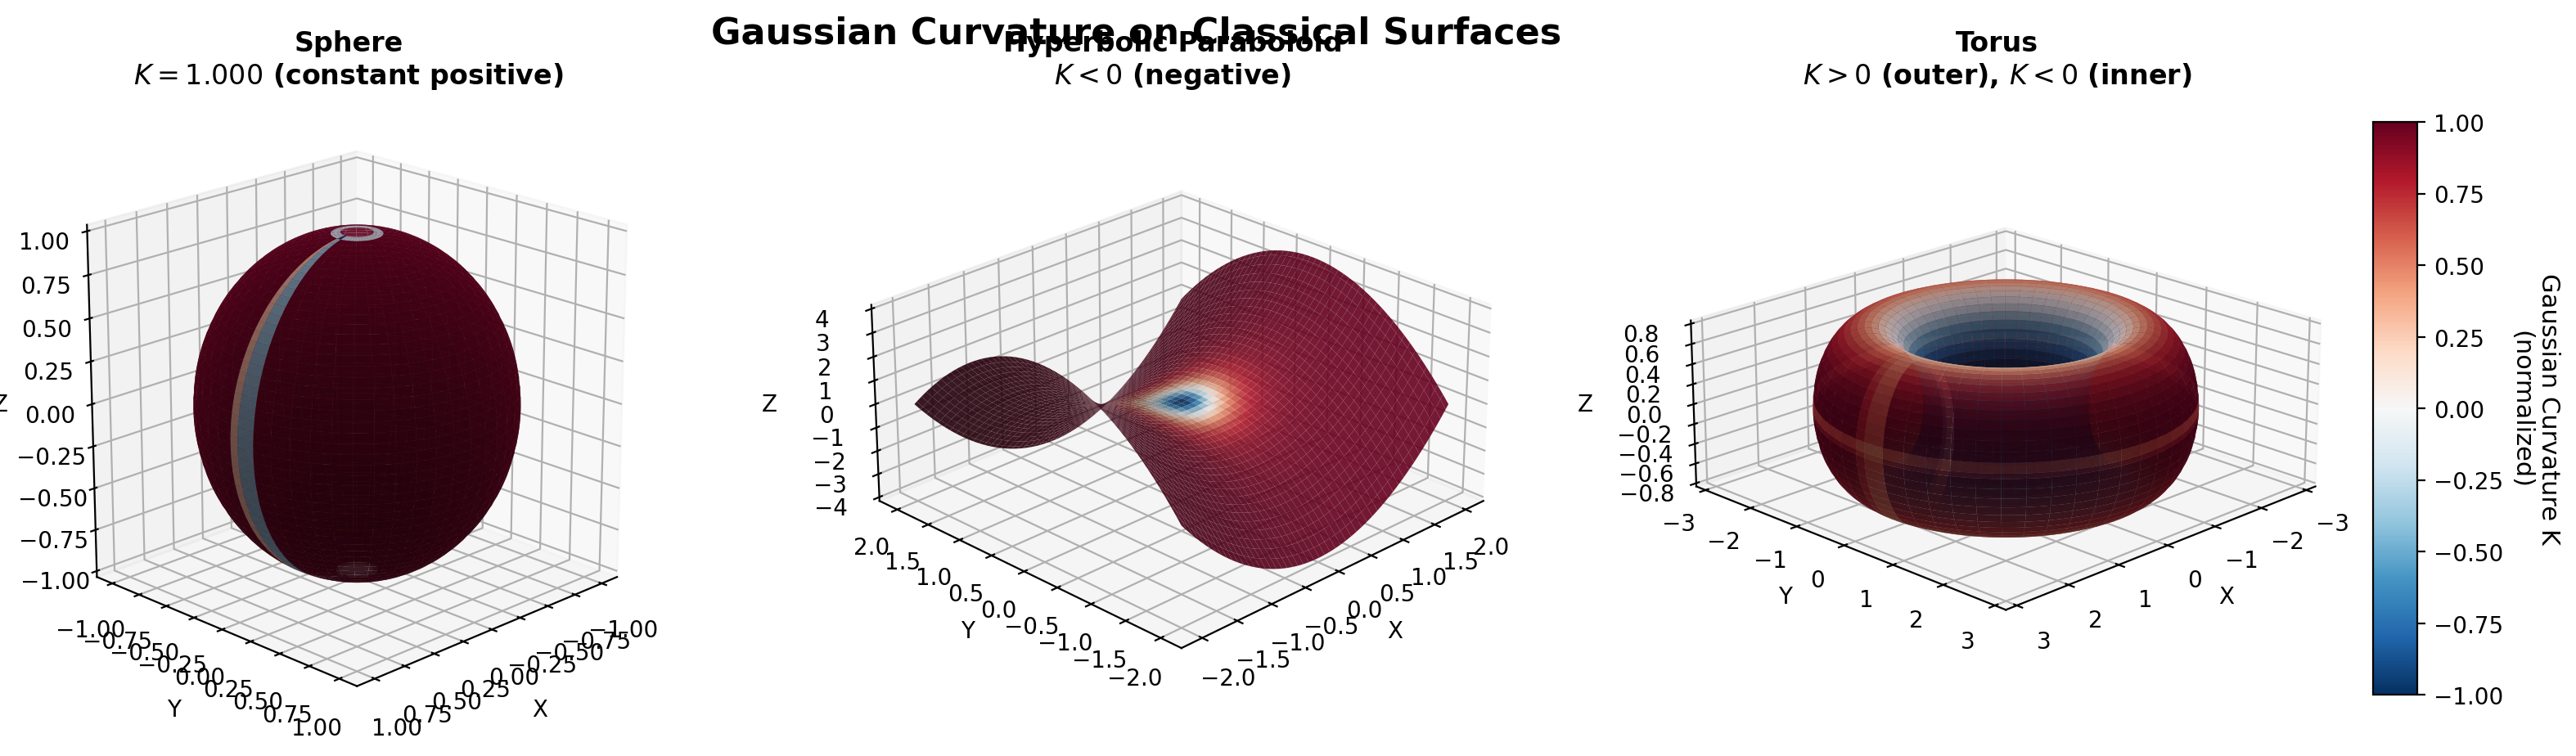

In [6]:
fig = plt.figure(figsize=(18, 5))

# Sphere
ax1 = fig.add_subplot(131, projection='3d')
surf1 = ax1.plot_surface(X_sphere, Y_sphere, Z_sphere, 
                         facecolors=cm.RdBu_r((K_sphere - K_sphere.min()) / (K_sphere.max() - K_sphere.min())),
                         rstride=2, cstride=2, alpha=0.9, linewidth=0, antialiased=True)
ax1.set_title(f'Sphere\n$K = {1/R**2:.3f}$ (constant positive)', fontsize=12, fontweight='bold')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.view_init(elev=20, azim=45)
ax1.set_box_aspect([1,1,1])

# Hyperbolic Paraboloid
ax2 = fig.add_subplot(132, projection='3d')
surf2 = ax2.plot_surface(X_saddle, Y_saddle, Z_saddle,
                         facecolors=cm.RdBu_r((K_saddle - K_saddle.min()) / (K_saddle.max() - K_saddle.min())),
                         rstride=2, cstride=2, alpha=0.9, linewidth=0, antialiased=True)
ax2.set_title(f'Hyperbolic Paraboloid\n$K < 0$ (negative)', fontsize=12, fontweight='bold')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.view_init(elev=25, azim=225)
ax2.set_box_aspect([1,1,0.5])

# Torus
ax3 = fig.add_subplot(133, projection='3d')
# Normalize curvature for color mapping (clamp extreme values for better visualization)
K_torus_clipped = np.clip(K_torus, np.percentile(K_torus, 5), np.percentile(K_torus, 95))
surf3 = ax3.plot_surface(X_torus, Y_torus, Z_torus,
                         facecolors=cm.RdBu_r((K_torus_clipped - K_torus_clipped.min()) / (K_torus_clipped.max() - K_torus_clipped.min())),
                         rstride=2, cstride=2, alpha=0.9, linewidth=0, antialiased=True)
ax3.set_title(f'Torus\n$K > 0$ (outer), $K < 0$ (inner)', fontsize=12, fontweight='bold')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')
ax3.view_init(elev=20, azim=45)
ax3.set_box_aspect([1,1,0.4])

# Add colorbar
fig.subplots_adjust(right=0.9, wspace=0.3)
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])
sm = cm.ScalarMappable(cmap=cm.RdBu_r, norm=plt.Normalize(vmin=-1, vmax=1))
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Gaussian Curvature K\n(normalized)', rotation=270, labelpad=25, fontsize=11)

plt.suptitle('Gaussian Curvature on Classical Surfaces', fontsize=16, fontweight='bold', y=0.98)

plt.savefig('gaussian_curvature_analysis.png', dpi=150, bbox_inches='tight')
print("\nVisualization saved as 'plot.png'")
plt.show()

## Summary and Physical Interpretation

### Key Results:

1. **Sphere**: Constant positive curvature $K = 1/R^2$
   - All points "curve the same way" in all directions
   - Intrinsically spherical geometry (triangle angles sum > 180°)

2. **Hyperbolic Paraboloid**: Negative curvature $K < 0$
   - Principal curvatures have opposite signs (saddle shape)
   - Intrinsically hyperbolic geometry (triangle angles sum < 180°)

3. **Torus**: Variable curvature
   - Positive on outer rim (locally spherical)
   - Negative on inner rim (locally hyperbolic)
   - Zero at top/bottom (locally flat)

### Physical Applications:

- **General Relativity**: Gaussian curvature extends to spacetime curvature (Riemann tensor)
- **Material Science**: Curvature affects stress distribution in shells and membranes
- **Computer Graphics**: Surface curvature analysis for mesh quality and feature detection
- **Cartography**: Understanding map distortions (you cannot flatten a sphere without distortion!)

### The Theorema Egregium in Practice:

The remarkable consequence is that **you cannot bend a sphere into a plane** (or vice versa) without tearing or stretching, because their Gaussian curvatures differ ($K=1/R^2$ vs. $K=0$). This is why every flat map of Earth contains distortions!